### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-09,442009,4607804,656666,585174,266150,134166,129766,186999,115941,92559,85218,125480,112935,4848,198621
2021-09-10,442317,4616846,658992,585846,266150,134313,129828,187768,116049,92604,85290,125529,113380,4848,198673
2021-09-11,442655,4625126,659691,586558,267524,134469,129885,188546,116095,92612,85290,125592,113824,4848,198728
2021-09-12,442874,4630613,659970,586851,267748,134525,129919,189319,116124,92625,85290,125647,114311,4848,198764
2021-09-13,443213,4639619,662106,587066,267969,134587,129955,190031,116245,92694,85393,125687,114759,4849,198799


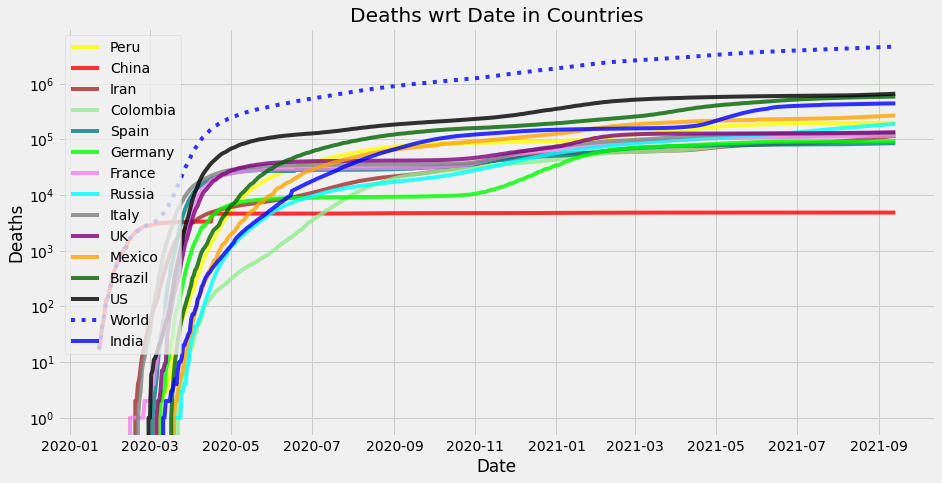

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-09,34973,633074,157467,30891,14828,37570,5518,18033,18120,23718,4763,1803,26821,19,957
2021-09-10,33376,628886,223369,15951,0,37012,5617,18008,10017,3148,4440,1772,21114,30,813
2021-09-11,28591,448759,61542,14314,26744,28899,5191,18564,9749,8537,0,1806,16654,50,1021
2021-09-12,27254,362108,33807,10615,5139,28641,4664,18235,7979,6945,0,1671,20219,52,759
2021-09-13,25404,611188,262049,6645,4161,30416,2792,17861,2318,6287,7804,1314,22541,93,272


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-09,39212,617427,145711,24219,14594,34656,5747,19061,15956,9216,8701,3256,30673,38,1065
2021-09-10,38823,618191,150888,23667,13621,34813,5738,18991,15560,8812,8417,3157,30035,38,1048
2021-09-11,38141,606895,144931,23044,14496,34419,5702,18962,15172,8793,7856,3067,29143,38,1046
2021-09-12,37415,590576,137523,22215,13872,34034,5633,18914,14693,8670,7332,2974,28548,39,1027
2021-09-13,36614,591950,145825,21177,13225,33793,5443,18844,13868,8511,7364,2863,28148,43,977


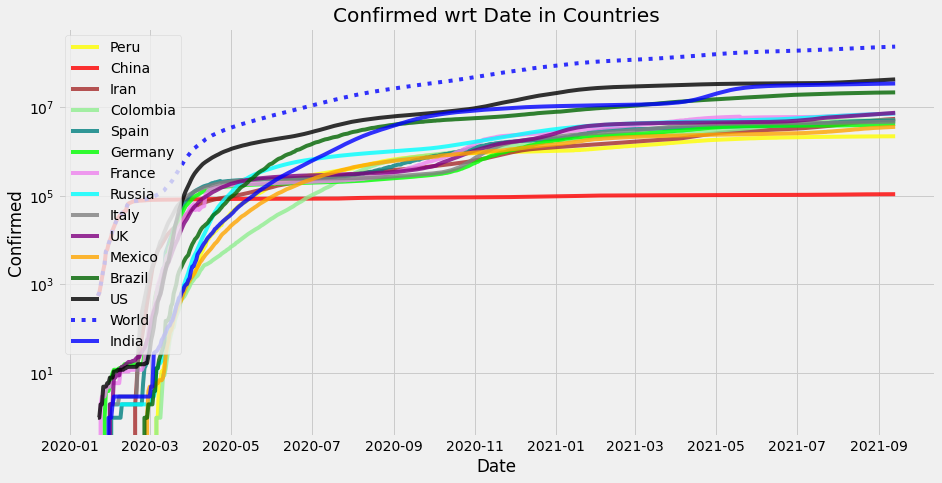

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-09,260,10623,3222,753,730,167,59,775,95,96,71,53,505,0,26
2021-09-10,308,9042,2326,672,0,147,62,769,108,45,72,49,445,0,52
2021-09-11,338,8280,699,712,1374,156,57,778,46,8,0,63,444,0,55
2021-09-12,219,5487,279,293,224,56,34,773,29,13,0,55,487,0,36
2021-09-13,339,9006,2136,215,221,62,36,712,121,69,103,40,448,1,35


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-09,361.79,9609.78,1625.42,552.50,712.37,130.25,57.12,776.63,115.38,34.87,97.60,68.44,579.51,-0.00,41.33
2021-09-10,355.07,9538.81,1712.99,567.44,623.32,132.34,57.73,775.68,114.46,36.14,94.40,66.01,562.69,-0.00,42.66
2021-09-11,352.93,9381.46,1586.24,585.51,717.16,135.30,57.64,775.97,105.90,32.62,82.60,65.63,547.86,-0.00,44.20
2021-09-12,336.19,8894.65,1422.84,548.95,655.51,125.39,54.68,775.60,96.29,30.17,72.28,64.30,540.25,-0.00,43.18
2021-09-13,336.54,8908.57,1511.98,507.20,601.20,117.46,52.35,767.65,99.38,35.02,76.12,61.27,528.72,0.12,42.16


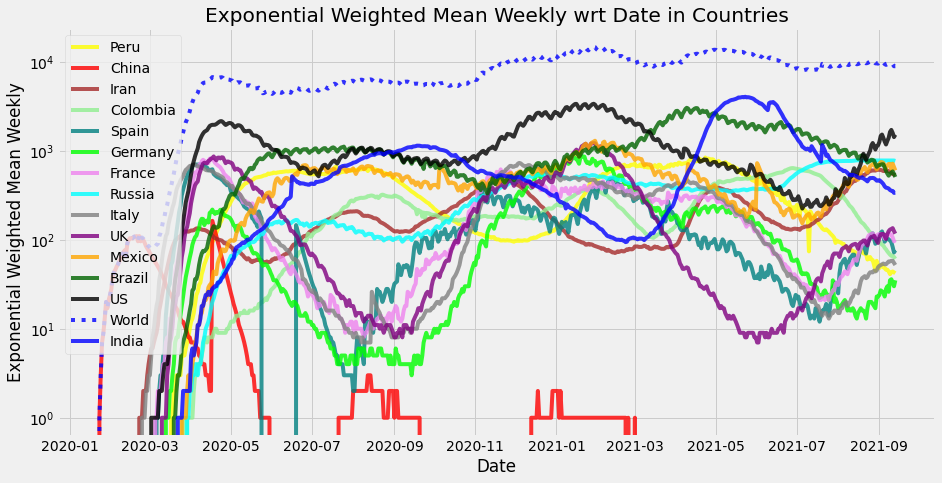

In [18]:
plotter(np.round(AVG), name)

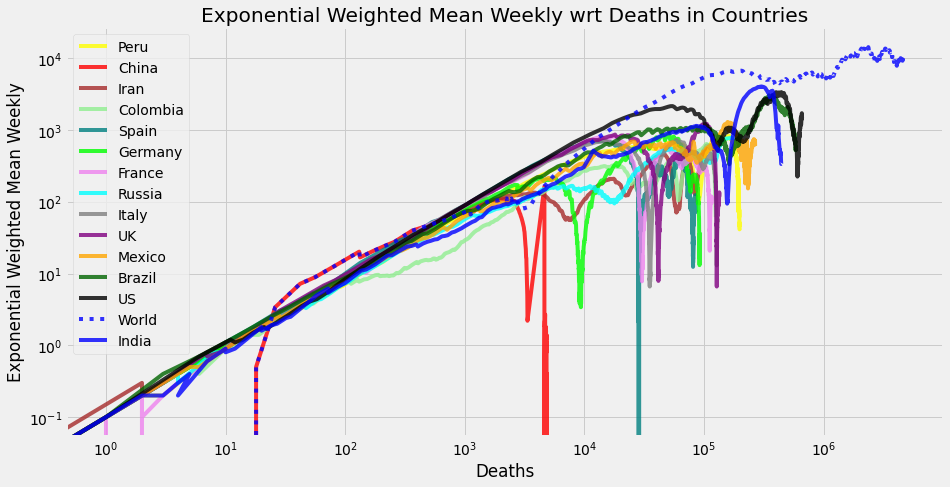

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

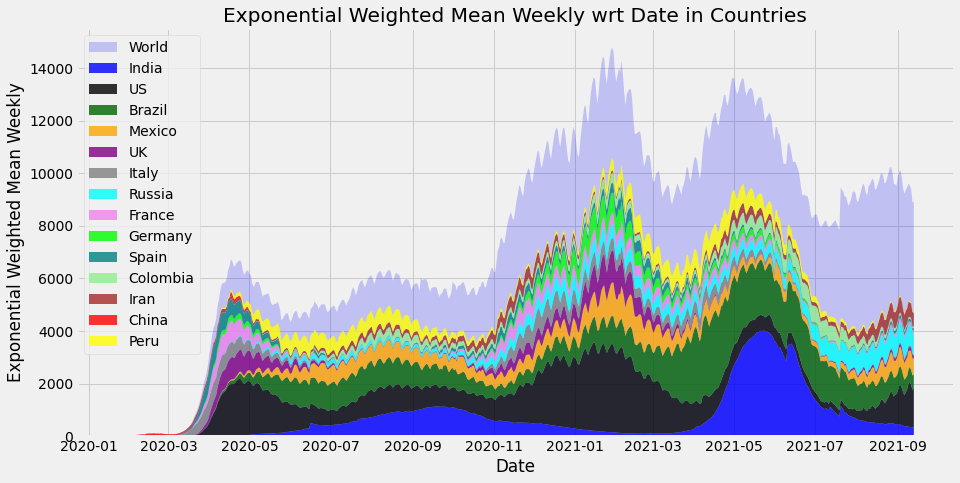

In [20]:
stackplotter(AVG, name)

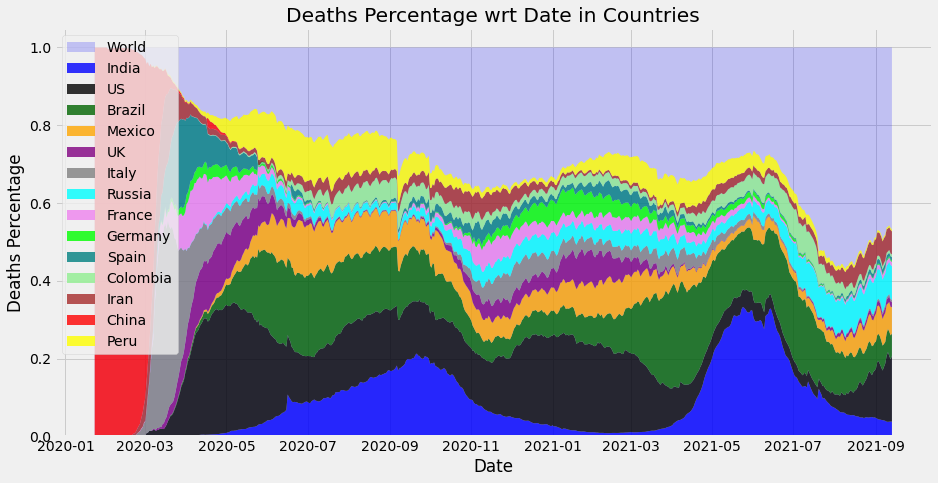

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

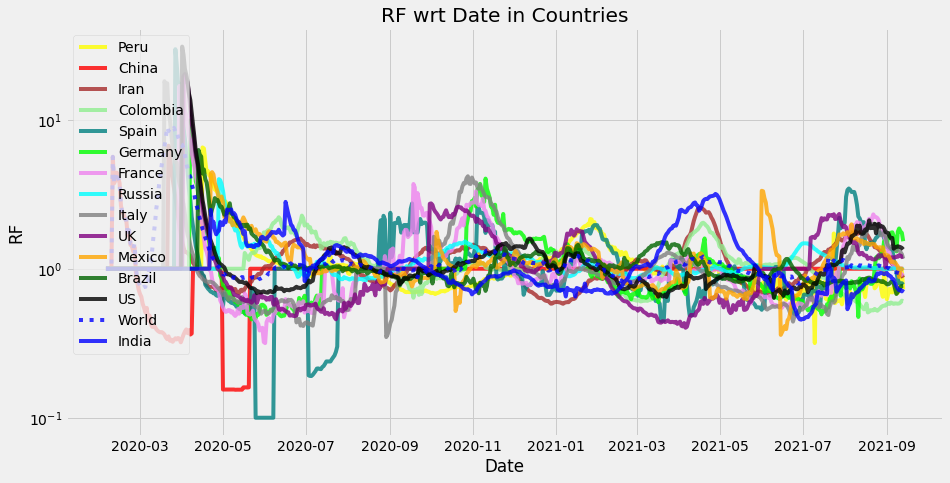

In [23]:
plotter(Reproductivity, 'RF')

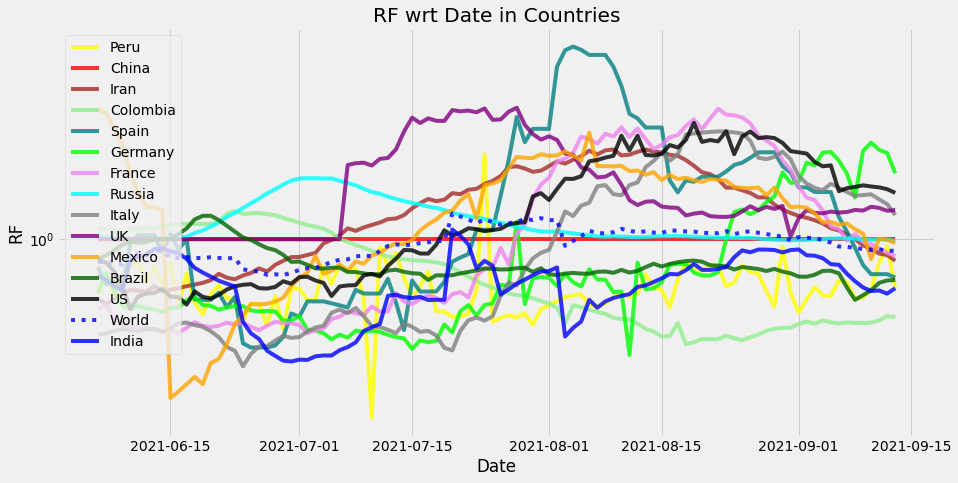

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

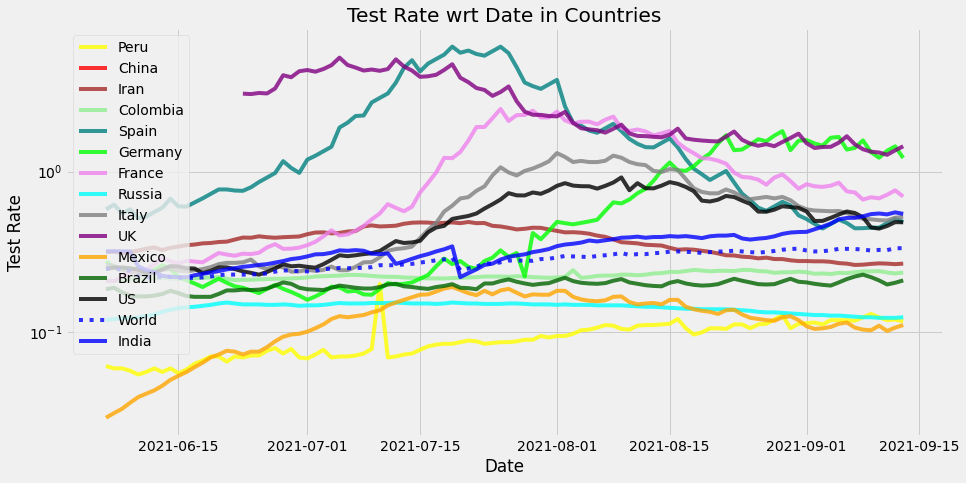

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

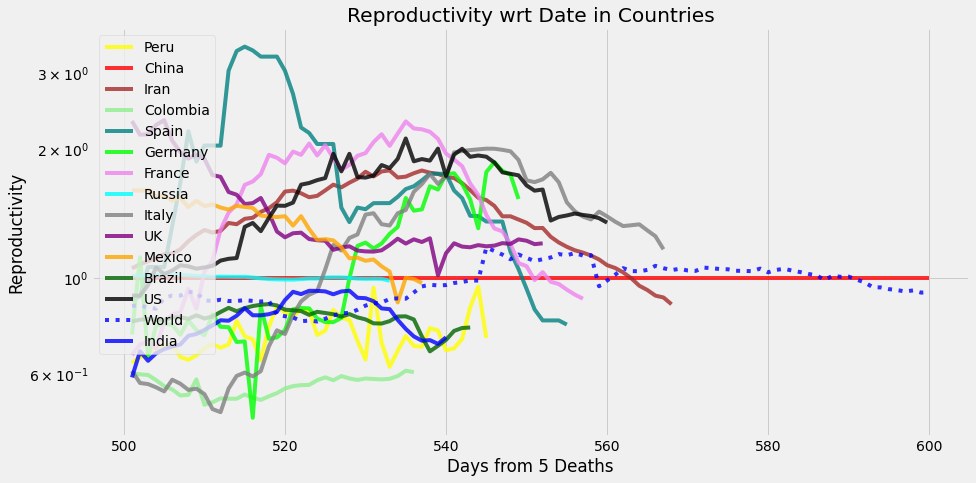

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

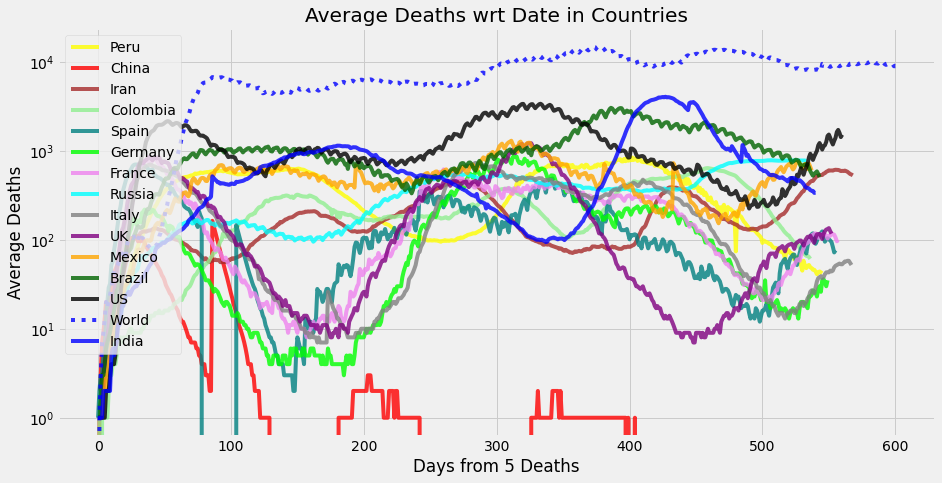

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

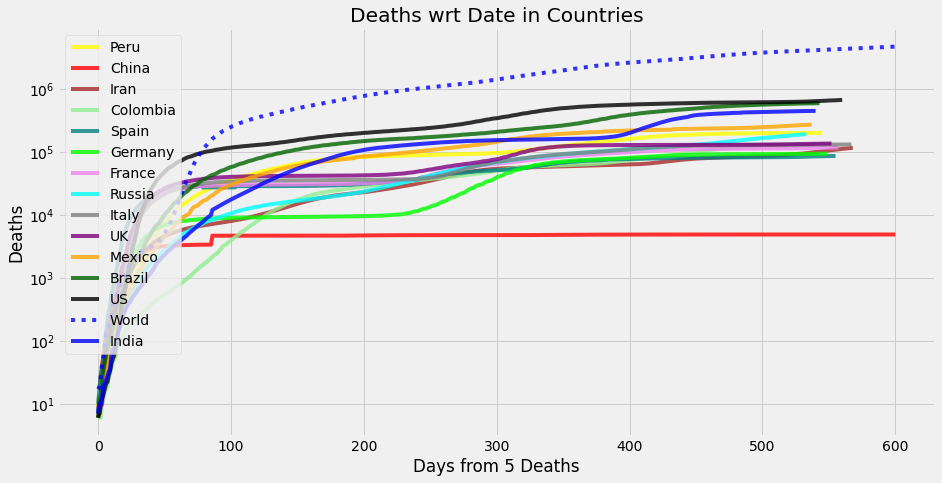

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4639619,9006,9001.29,8908.57,0.9297,225270139,0.332,591950,927.92
US,662106,2136,1843.29,1511.98,1.3482,41221266,0.482,145825,132.42
Brazil,587066,215,465.14,507.20,0.7694,21006424,0.209,21177,117.41
India,443213,339,310.14,336.54,0.7299,33289579,0.544,36614,88.64
Mexico,267969,221,642.71,601.20,0.9758,3516043,0.110,13225,53.59
Peru,198799,35,39.43,42.16,0.7273,2161358,0.116,977,39.76
Russia,190031,712,765.57,767.65,0.9880,7055296,0.123,18844,38.01
Indonesia,139165,276,384.57,490.70,0.5256,4170088,0.117,11477,27.83
UK,134587,62,141.29,117.46,1.2068,7290168,1.438,33793,26.92


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4639619,9006,9001.29,8908.57,0.9297,225270139,0.332,591950,927.92
US,662106,2136,1843.29,1511.98,1.3482,41221266,0.482,145825,132.42
Russia,190031,712,765.57,767.65,0.9880,7055296,0.123,18844,38.01
Mexico,267969,221,642.71,601.20,0.9758,3516043,0.110,13225,53.59
Iran,114759,448,500.29,528.72,0.8712,5318327,0.266,28148,22.95
Brazil,587066,215,465.14,507.20,0.7694,21006424,0.209,21177,117.41
Indonesia,139165,276,384.57,490.70,0.5256,4170088,0.117,11477,27.83
Malaysia,21124,413,376.14,346.84,1.2984,1995771,0.280,19456,4.22
Vietnam,15660,381,325.00,326.70,0.9549,624547,0.179,11664,3.13


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4639619


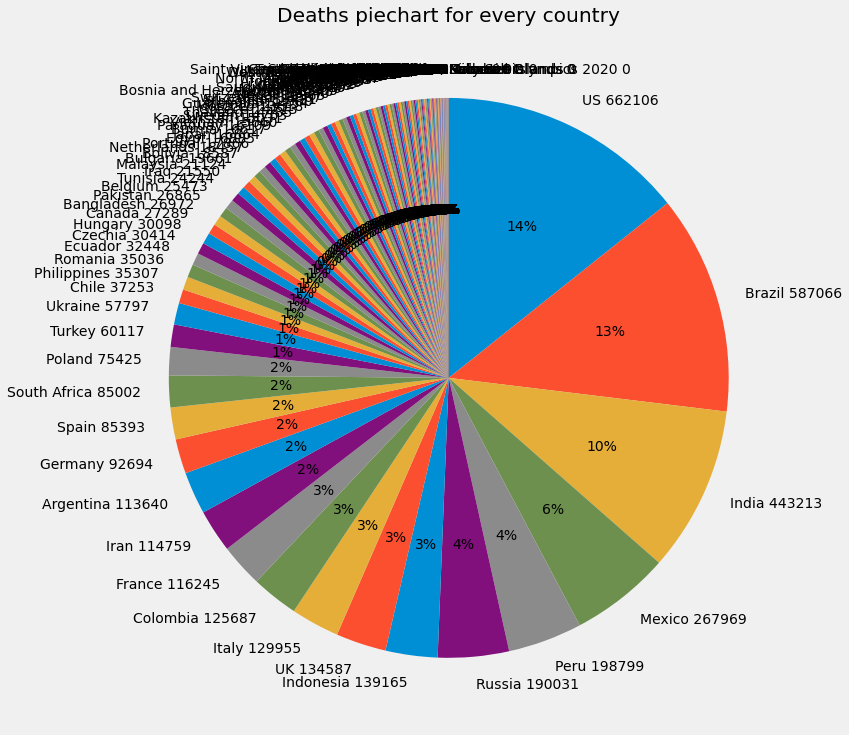

In [35]:
piechart('Deaths')

World total:  9001


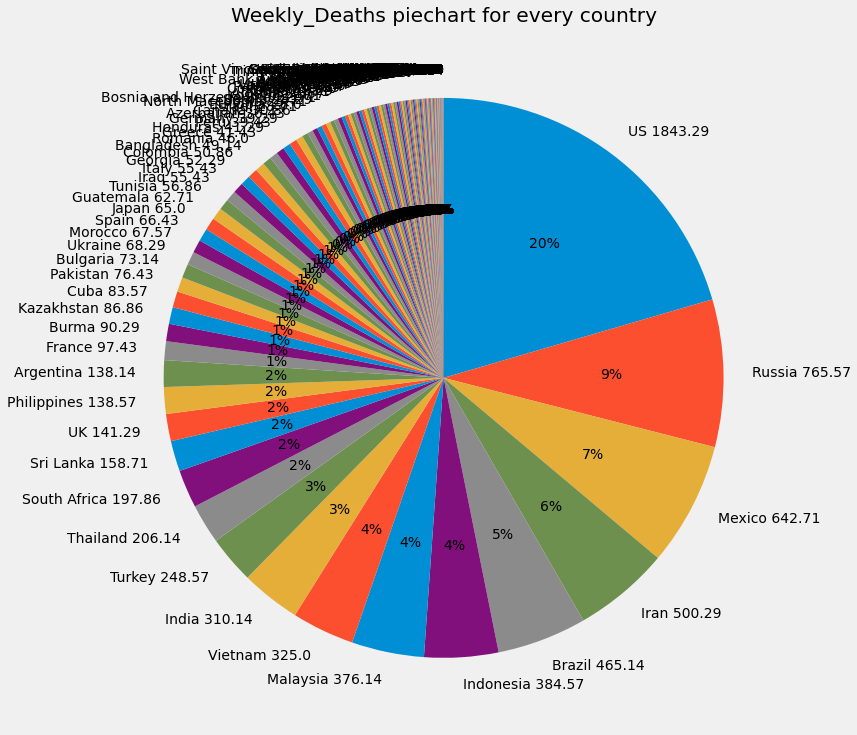

In [36]:
piechart('Weekly_Deaths')

World total:  9006


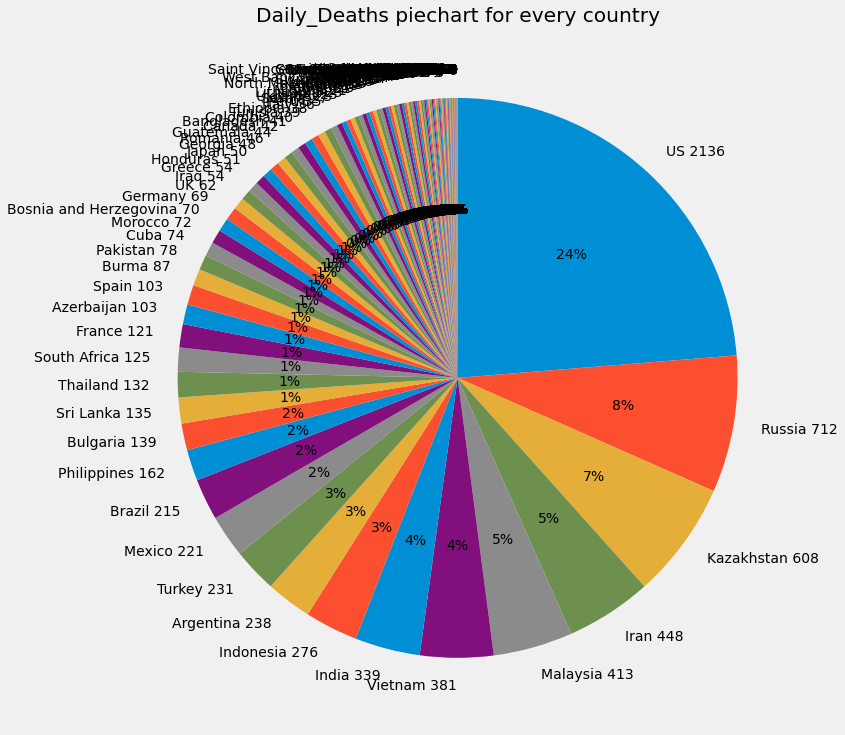

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-14


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

927923800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 1cd2dcb] `date` update
 1 file changed, 3 insertions(+), 3 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   6c166a1..1cd2dcb  master -> master
